In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout,LayerNormalization,\
Conv2D

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
classifier=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(264,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
      
    
])

In [7]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        3

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128,128),
    batch_size=18,
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.


In [13]:
test_set=test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128,128),
    batch_size=18,
    class_mode='binary'

)

Found 340 images belonging to 2 classes.


In [14]:
print(training_set.class_indices)

{'man': 0, 'woman': 1}


In [15]:
history=classifier.fit_generator(training_set,epochs=50,validation_data=test_set)

Epoch 1/50
89/89 [==============================] - 29s 327ms/step - loss: 0.7541 - accuracy: 0.5562 - val_loss: 0.5499 - val_accuracy: 0.7500
Epoch 2/50
89/89 [==============================] - 23s 262ms/step - loss: 0.6504 - accuracy: 0.6431 - val_loss: 0.5812 - val_accuracy: 0.7647
Epoch 3/50
89/89 [==============================] - 24s 266ms/step - loss: 0.6223 - accuracy: 0.6781 - val_loss: 0.5256 - val_accuracy: 0.7735
Epoch 4/50
89/89 [==============================] - 24s 266ms/step - loss: 0.6047 - accuracy: 0.6850 - val_loss: 0.4755 - val_accuracy: 0.7882
Epoch 5/50
89/89 [==============================] - 24s 273ms/step - loss: 0.5440 - accuracy: 0.7331 - val_loss: 0.4437 - val_accuracy: 0.8324
Epoch 6/50
89/89 [==============================] - 24s 266ms/step - loss: 0.5293 - accuracy: 0.7450 - val_loss: 0.4272 - val_accuracy: 0.8118
Epoch 7/50
89/89 [==============================] - 24s 268ms/step - loss: 0.4812 - accuracy: 0.7681 - val_loss: 0.4159 - val_accuracy: 0.8294

In [19]:
classifier.save('detectfacemodel.h5')


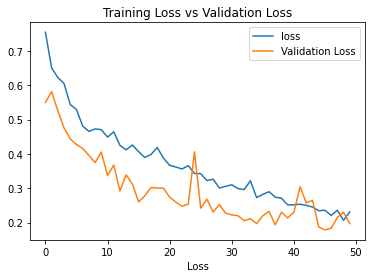

In [20]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

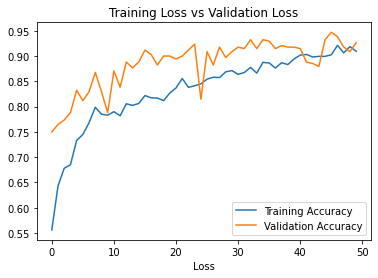

In [21]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()


In [63]:
import time
def load_imgtest(path_to_img):
    # max_dim = 150
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    plt.imshow(img)
    img = tf.image.resize(img, [128,128]) # img = tf.image.resize(img, new_shape)
    
    img = img[tf.newaxis, :]
    return img
    

(1, 128, 128, 3)


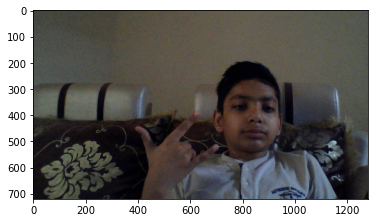

In [64]:
train_img = load_imgtest('WIN_20200620_13_32_52_Pro.jpg')
print(train_img.shape)


In [65]:
from tensorflow.keras.models import load_model
model = load_model('detectfacemodel.h5')

pred = model.predict_classes(train_img)
if pred==0:
  print('men')
else:
  print('women')

men


# predict from man images dataset 

no. of Man:158
 no. of women:12


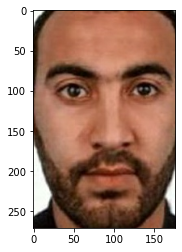

In [66]:
man=0
women=0

from tensorflow.keras.models import load_model
model = load_model('detectfacemodel.h5')
import glob
cv_img = []
for img in glob.glob("dataset/test/man//*.jpg"):
    n= load_imgtest(img)
    cv_img.append(n)
for i in cv_img:
  pred = model.predict_classes(i)
  if pred==0:
    man=man+1
        
  else:
    women=women+1
    
    
print('no. of Man:{}\n no. of women:{}'.format(man,women))